# Telecommunication Customer Churn Prediction

## Exploratory Data Analysis

The Background Introduction  
he data set includes information about:
Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online * security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method,

paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

Churn - dependent feature ('Yes' denotes customers left, 'No' denotes customer stay here)


In [62]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [63]:
#Code to verify the package installation
try:
  import scipy
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [64]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [65]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
import pickle
import time
from rich.progress import track

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Imbalanced Dataset Learning
from imblearn.combine import SMOTEENN

#Scikit-Learn Fundamental Packages
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
# from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [66]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction'
data_path =f'{work_dir}/data'
result_dir = f'{work_dir}/result'

In [67]:
import os
if not os.path.exists(data_path):
  os.mkdir(data_path)

In [68]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [69]:
%cd '{work_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction


In [70]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
data_dir = data_path
dataset_url_1 = 'TelcoCustomerChurn.csv'
dataset_url_2 = 'TelcoCustomerChurn.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_url_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_url_2), encoding = 'utf-8')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [71]:
target_feature = 'Churn'

In [72]:
print(f'the dataset_1 size is {df.shape} and dataset_2 size is {df2.shape}')

the dataset_1 size is (7043, 21) and dataset_2 size is (7043, 21)


In [73]:
# Check column name and categories
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [74]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [75]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [76]:
# Varify the data type match with corresponding columns types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [77]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [78]:
import table_nan_val as tnv

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


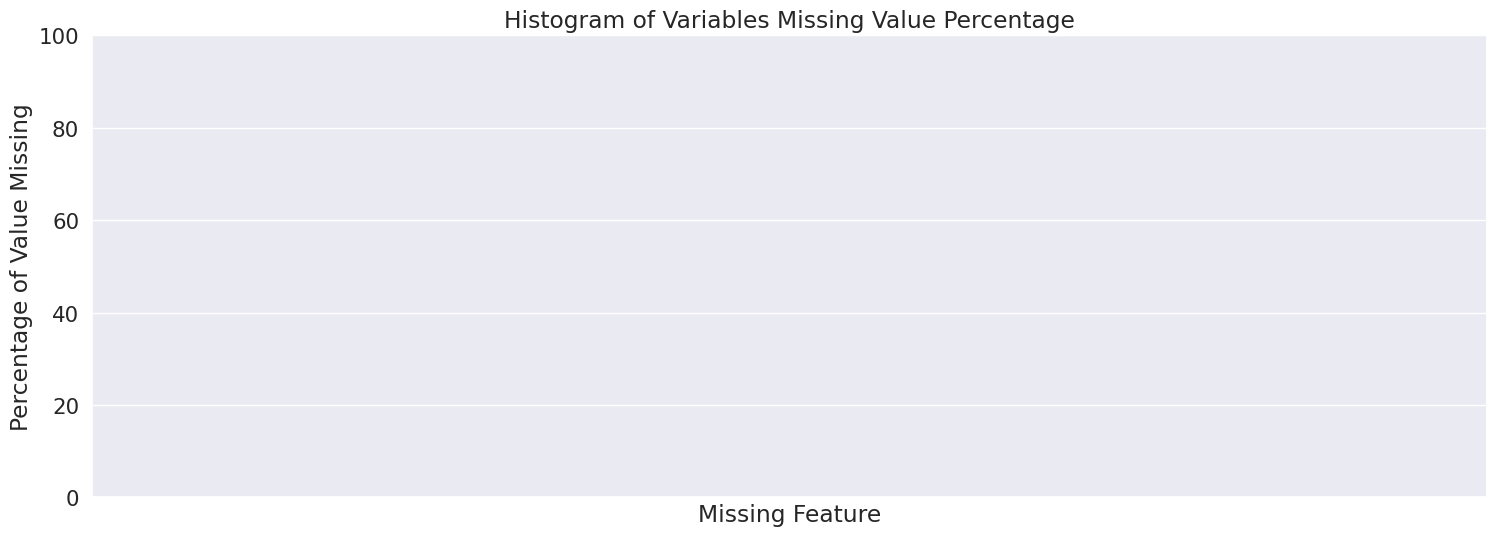

,index,Miss_Values,Miss_Rate,Available_Value


In [79]:
tnv.Missing_Value_Analysis(df)

In [80]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 22, (0.3%)



In [81]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [82]:
# Total charges are in object dtype so convert into Numerical feature
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [83]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure']*df['MonthlyCharges'])

In [84]:
df.drop(columns=['customerID'], inplace=True)

In [85]:
num_features = [feature for feature in df.columns if df[feature].dtypes!='O']
num_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [86]:
cat_features = [feature for feature in df.columns if df[feature].dtypes=='O']
print(len(cat_features))
cat_features

16


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [87]:
numeric_features = exe.column_identify(df,num_features)
numeric_features

{'SeniorCitizen': 2,
 'tenure': 73,
 'MonthlyCharges': 1585,
 'TotalCharges': 6531}

In [88]:
category_features = exe.column_identify(df,cat_features)
category_features

{'gender': 2,
 'Partner': 2,
 'Dependents': 2,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'Churn': 2}

In [89]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64


<Axes: >

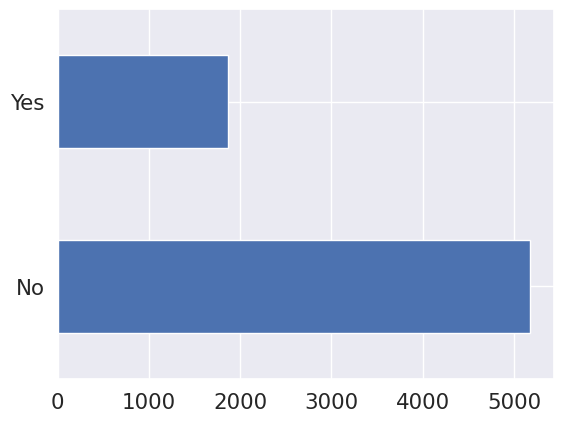

In [90]:
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot(kind='barh')

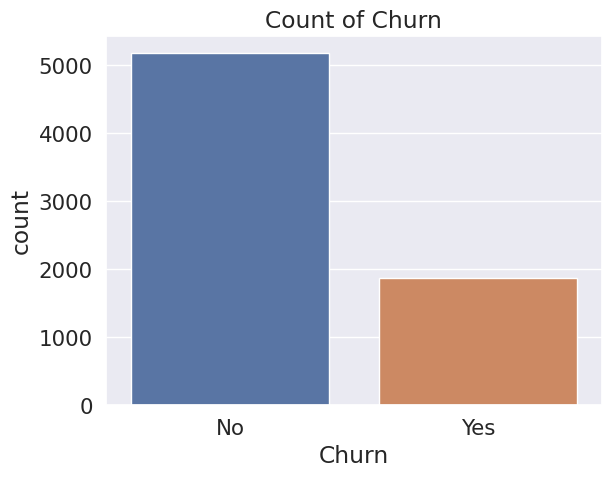

In [91]:
# plotting with target feature
sns.countplot(data=df, x='Churn')
plt.title('Count of Churn')
plt.show()

In [92]:
majornity_target_value = 'No'
target_value_percentage = exe.majority_target_variable(
    df, target_feature, majornity_target_value)

The Dataframe Value Count is: 7043 , and includes 2 values
The Majornity Target Value Count is: 5174
Majornity Target Value Percentage: 73.46%
This is a imbalance dataset.


In [93]:
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

<Figure size 640x480 with 0 Axes>

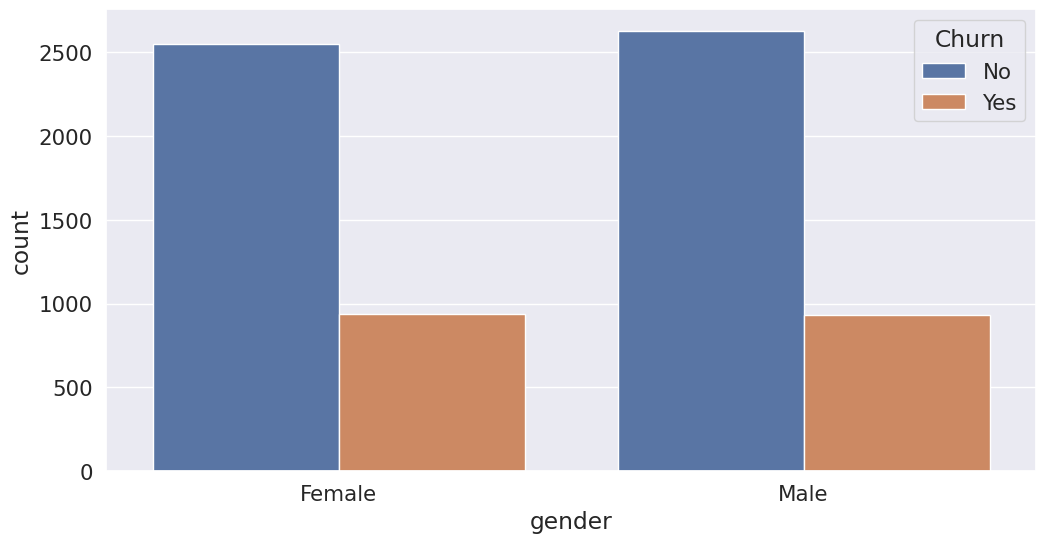

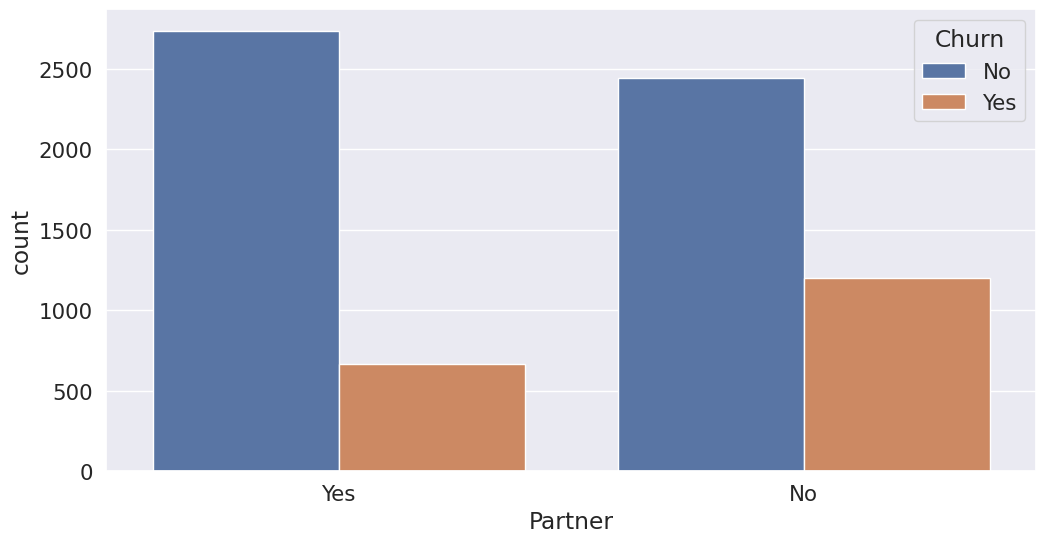

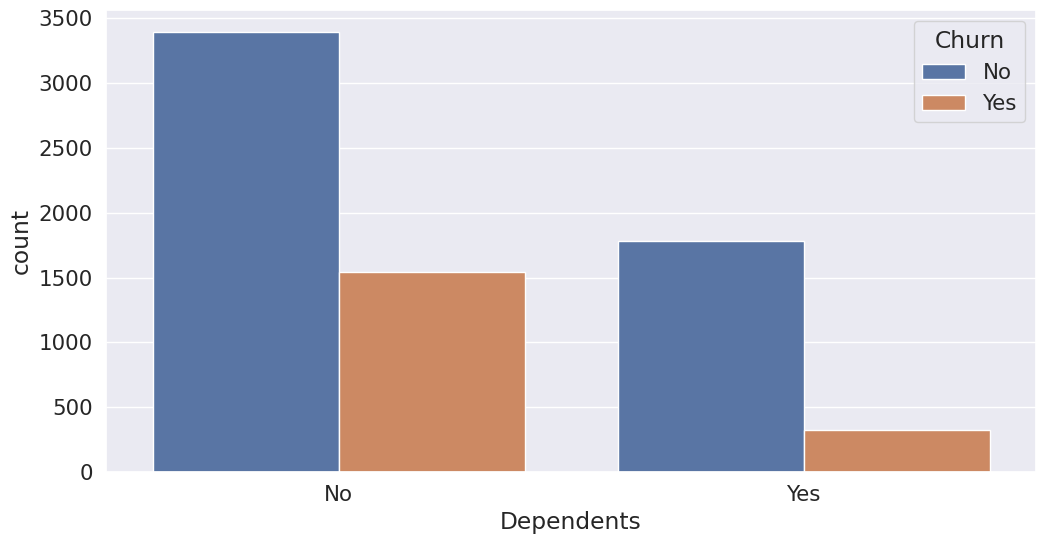

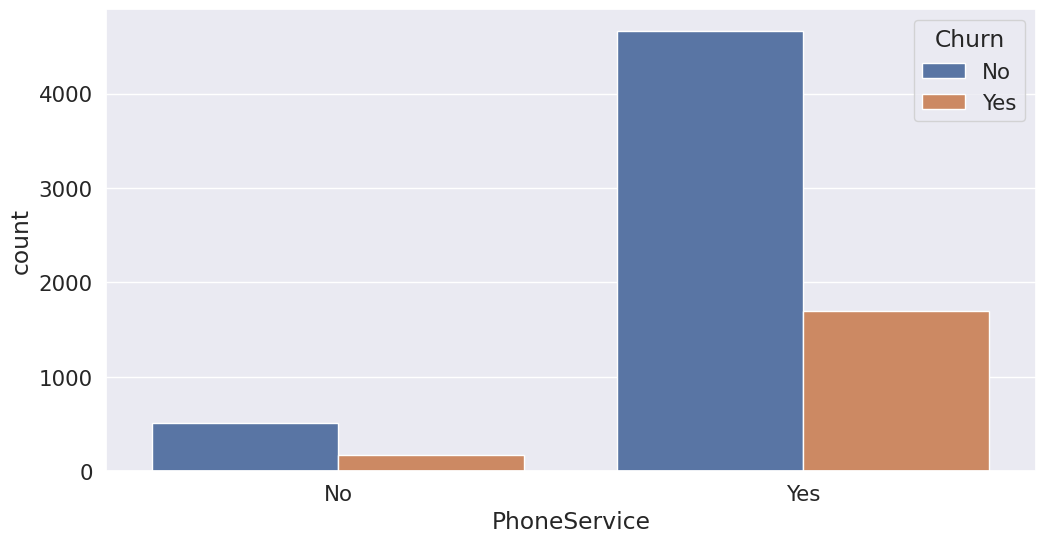

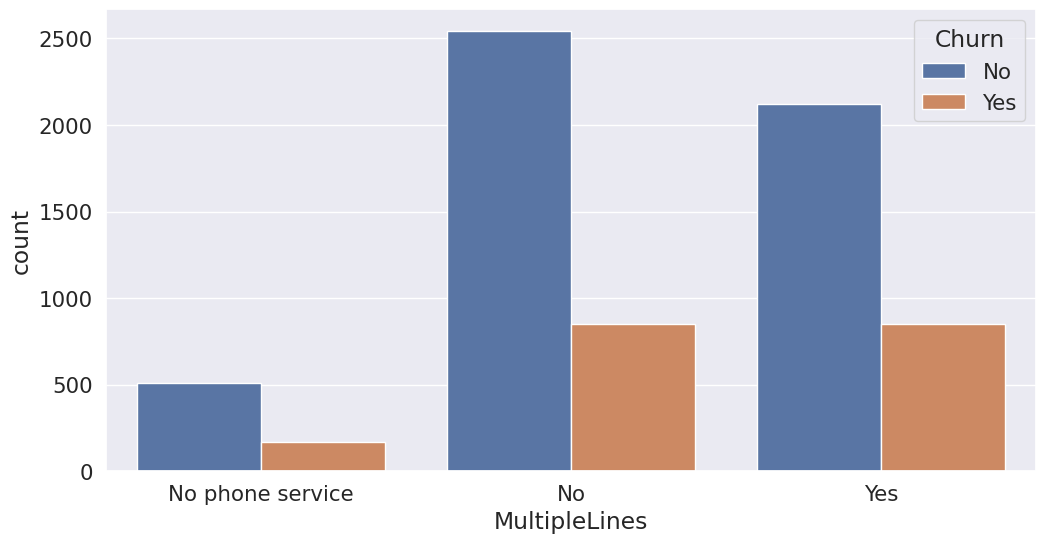

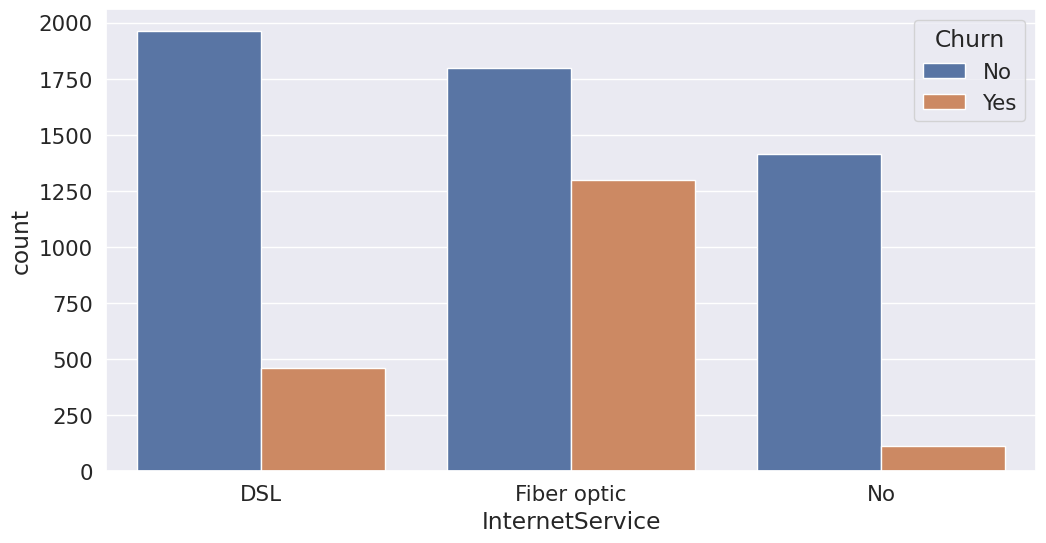

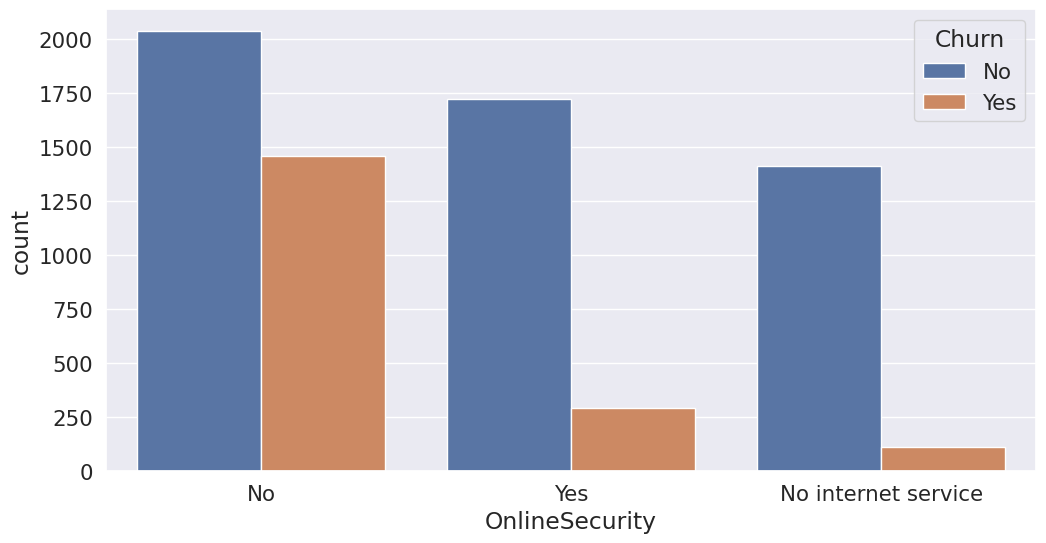

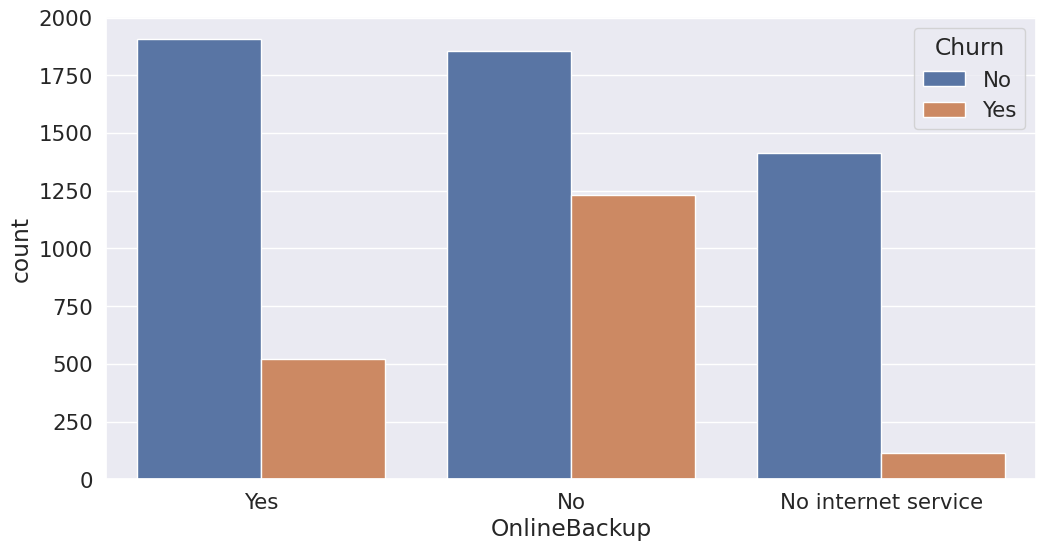

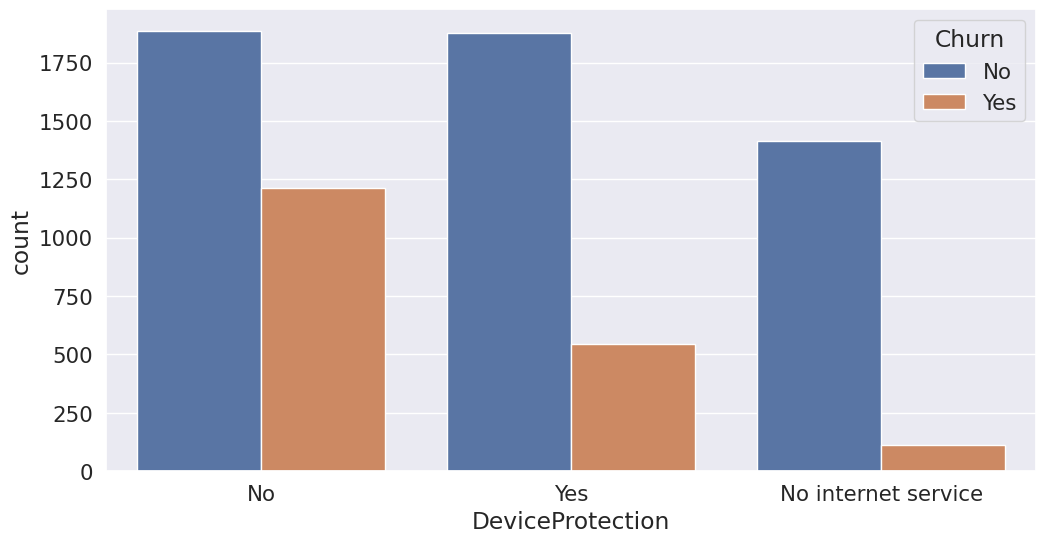

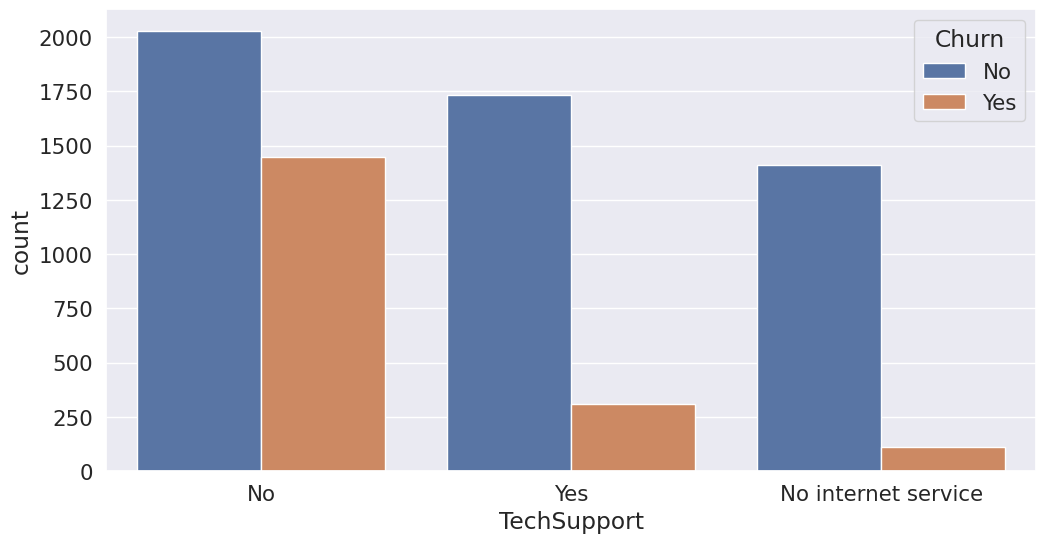

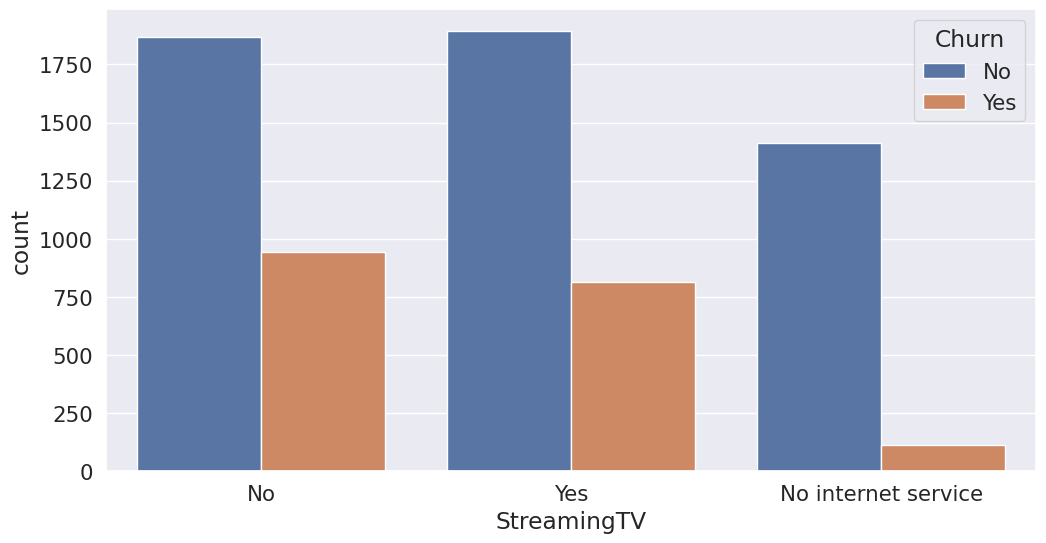

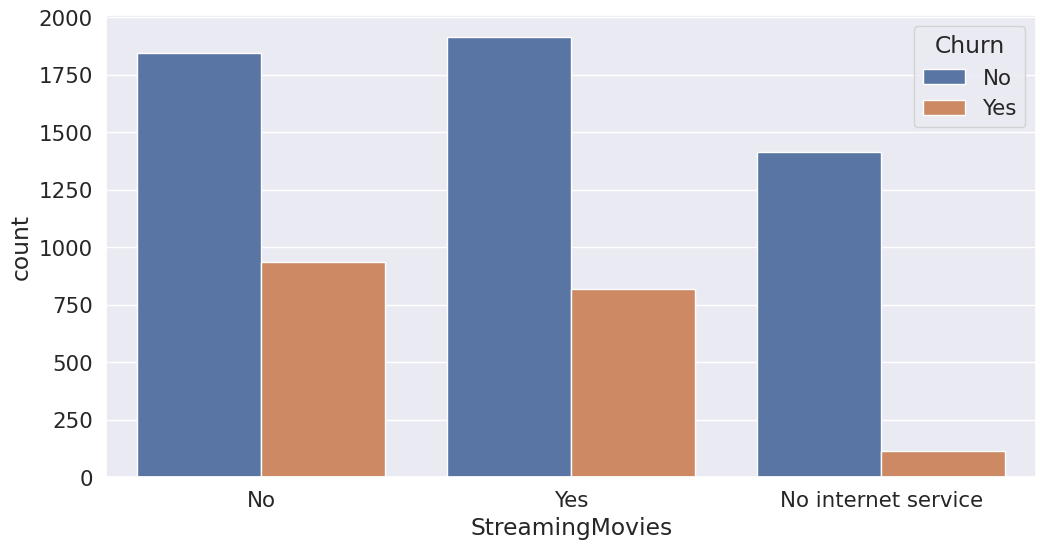

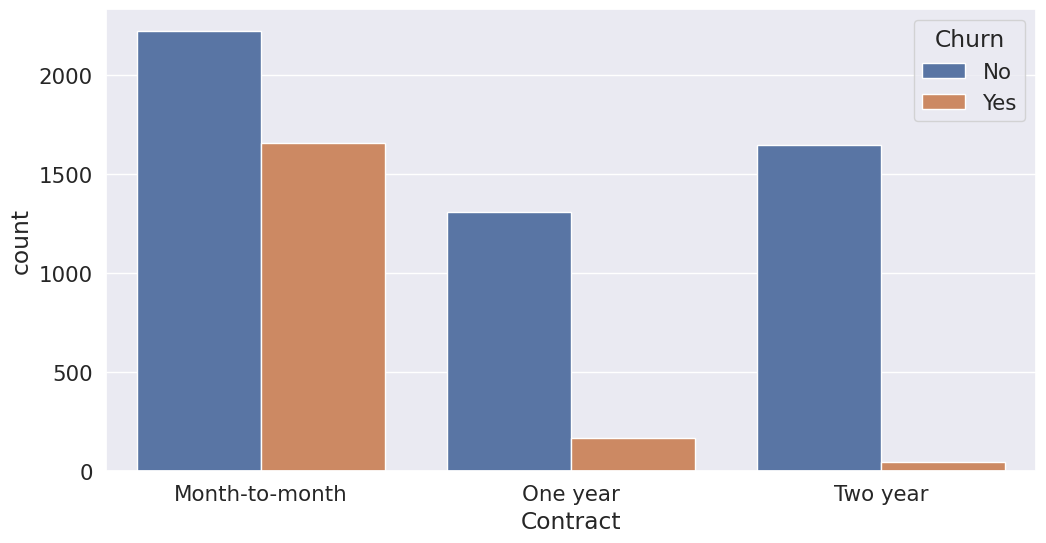

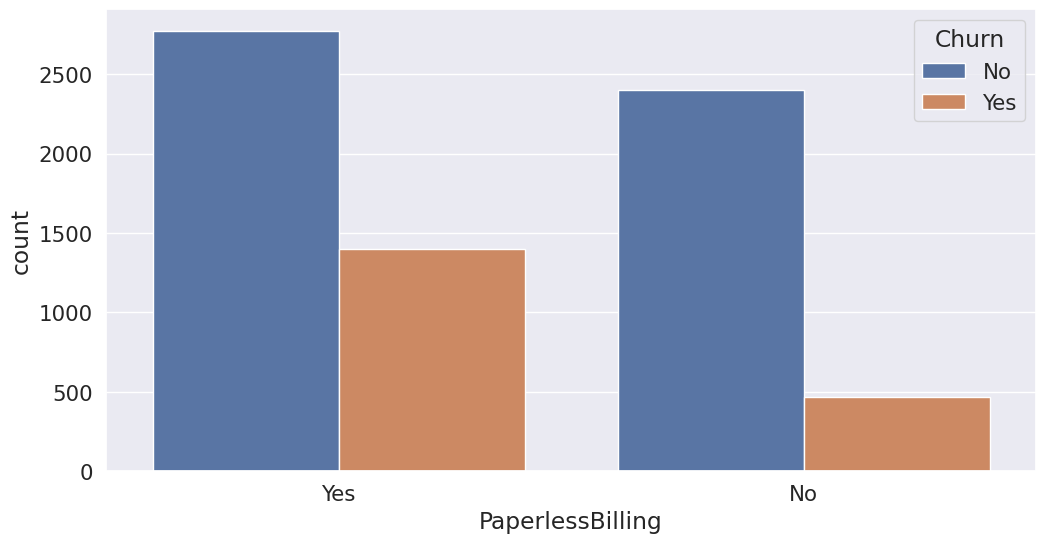

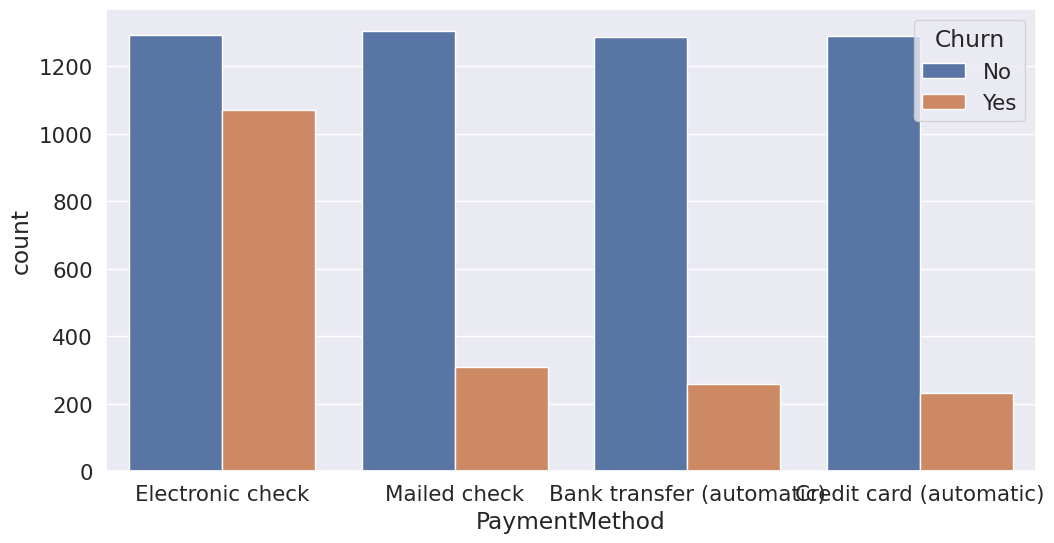

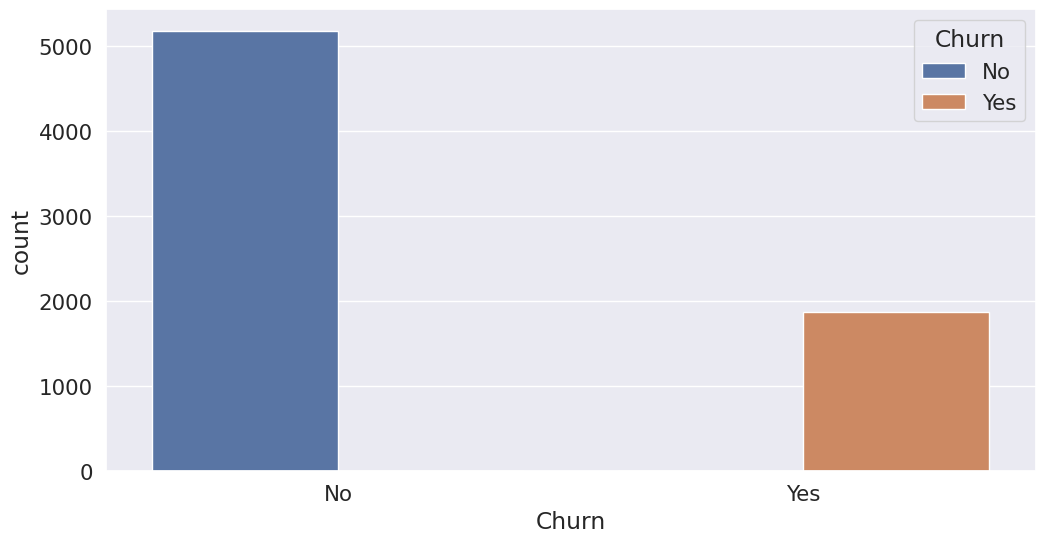

In [94]:
for i, feature in enumerate(cat_features):
  if(len(df[feature].unique()))<5:
    # print(i, feature)
    plt.figure(i)
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=feature, hue=target_feature)


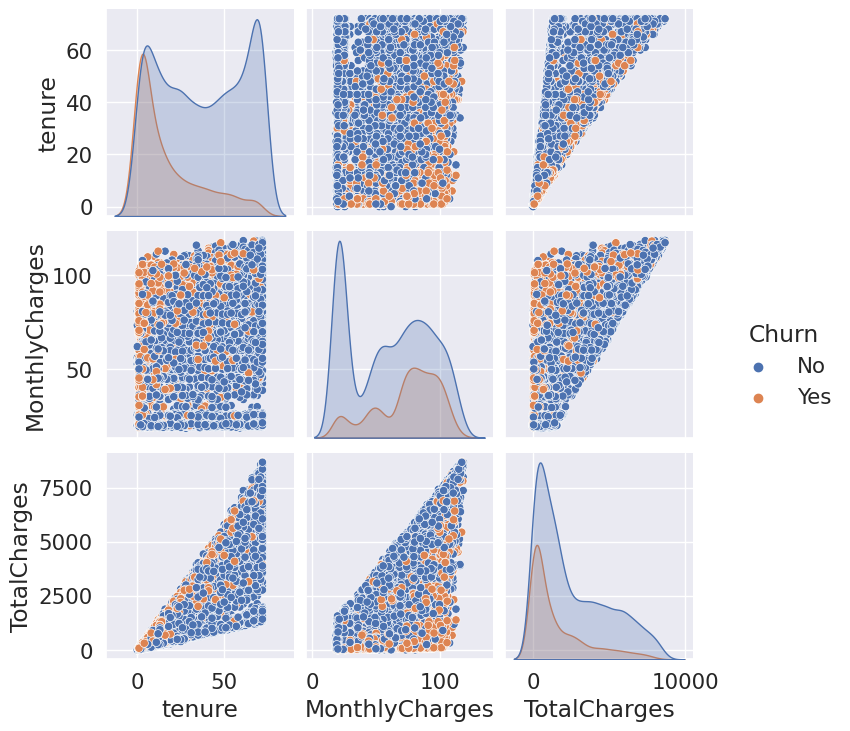

In [95]:
sns.pairplot(df.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

Text(0.5, 1.0, '% of Senior Citizens')

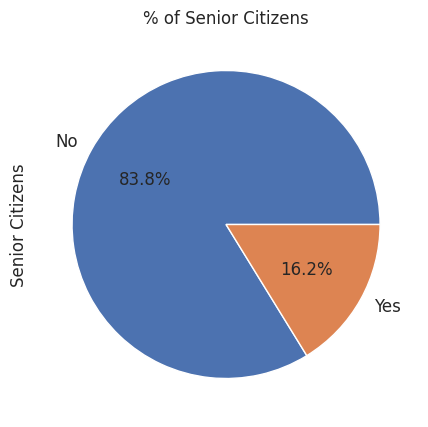

In [96]:
# pie chart for Count of Senior citizens
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

## Data Cleansing

In [97]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [98]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [99]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [100]:
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [101]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [102]:
# Replacing 'No phone service' with 'No' for column name 'MultipleLines'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)
df['MultipleLines'] = df['MultipleLines'].replace('No', 1)
df['MultipleLines'] = df['MultipleLines'].replace('Yes', 2)
df['MultipleLines'].value_counts()

1    3390
2    2971
0     682
Name: MultipleLines, dtype: int64

In [103]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [104]:
# Replacing 'No internet service' with 'No' for column name 'OnlineSecurity'
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')

In [105]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [106]:
# Replacing 'No internet service' with 'No' for column name 'OnlineSecurity'
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')

In [107]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [108]:
# Replacing 'No internet service' with 'No' for column name 'OnlineSecurity'
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')

In [109]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [110]:
# Replacing 'No internet service' with 'No' for column name 'OnlineSecurity'
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')

In [111]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [112]:
# Replacing 'No internet service' with 'No' for column name 'OnlineSecurity'
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')

In [113]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [114]:
# Replacing 'No internet service' with 'No' for column name 'OnlineSecurity'
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

In [115]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [116]:
# Replacing 'No internet service' with 'No' for column name 'OnlineSecurity'
df['Contract'] = df['Contract'].replace('Month-to-month', 'Monthly')

In [117]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [118]:
# Replacing 'No internet service' with 'No' for column name 'OnlineSecurity'
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 'Mailed Cheque')
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 'Mailed Cheque')
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 'E-Transfer')
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 'Credit card')

In [119]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          3
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [120]:
%cd '{result_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction/result
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction/result


In [121]:
df.to_csv('S602_Preprocessed_Data.csv', index=False)